## Final Project for Course (курсовая работа)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Information about dataset attributes:

- Pregnancies: To express the Number of pregnancies

- Glucose: To express the Glucose level in blood

- BloodPressure: To express the Blood pressure measurement

- SkinThickness: To express the thickness of the skin

- Insulin: To express the Insulin level in blood

- BMI: To express the Body mass index

- DiabetesPedigreeFunction: To express the Diabetes percentage

- Age: To express the age

- Outcome: To express the final result 1 is Yes and 0 is No

#### 1. Load the dataset

In [631]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from scripts.preprocess import DataPreprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [632]:
# load dataset
dataset = pd.read_csv("dataset/diabetes.csv", sep = ",", low_memory = False)
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### 2. Content analysis in the dataset

In [633]:
# info about the dataset
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [634]:
# dimensions of dataset
print("#Dataset-samples = ", dataset.shape[0])
print("#Dataset-features = ", dataset.shape[1])

#Dataset-samples =  768
#Dataset-features =  9


In [635]:
# definition of preprocessor
dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 9 
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Numerical features: 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Categorical features: 
 []


#### 3. Check data for cleaning

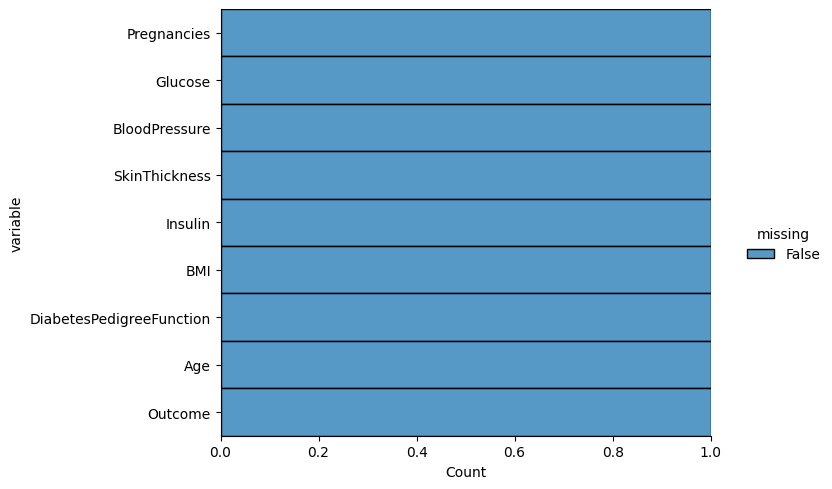

In [636]:
dp.filter_missing(dataset)

In [637]:
# amount of duplicated rows in dataset
print("Amount of duplicated rows:", dataset.duplicated().sum())

Amount of duplicated rows: 0


#### 4. Exploratory Data Analysis

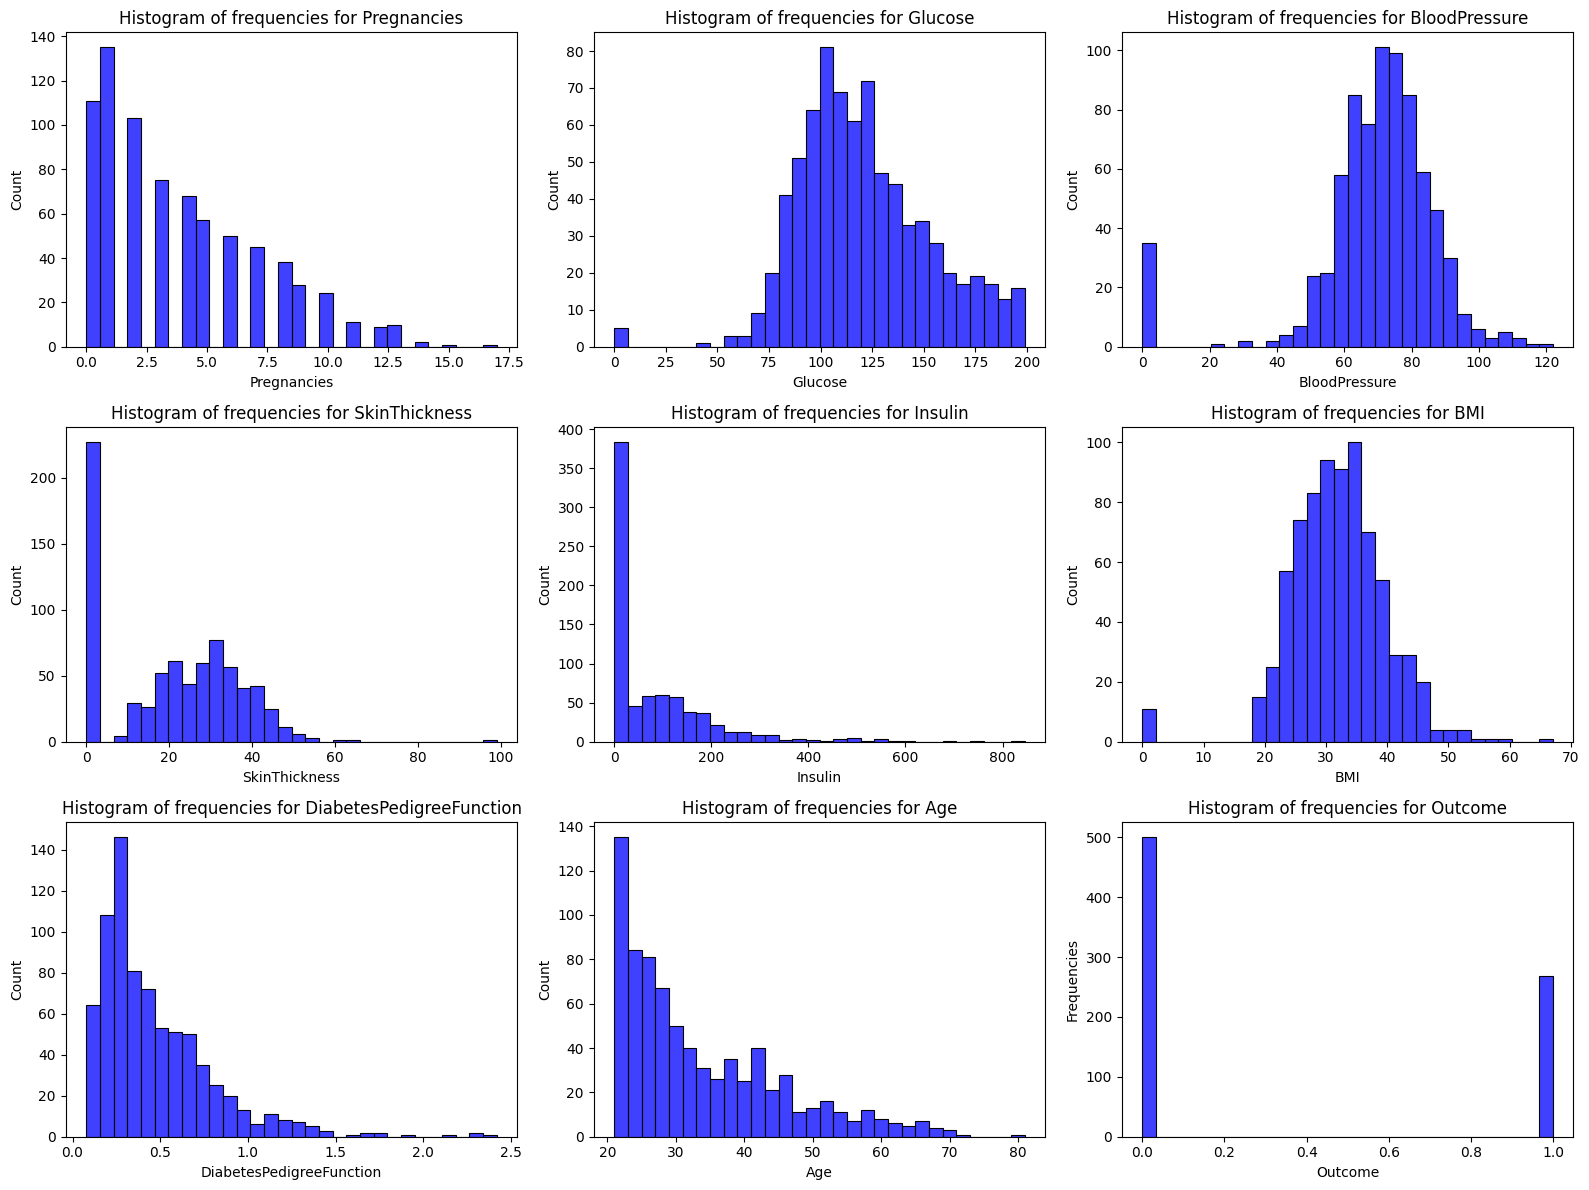

In [638]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(dataset, num_cols, bins = 30)

Outcome
0    500
1    268
Name: count, dtype: int64


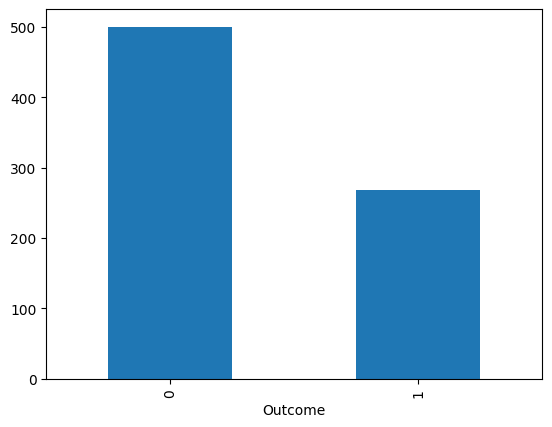

In [639]:
# information about thr Outcome variable
print(dataset.Outcome.value_counts())
p=dataset.Outcome.value_counts().plot(kind="bar")

#### 5. Correlation Analysis

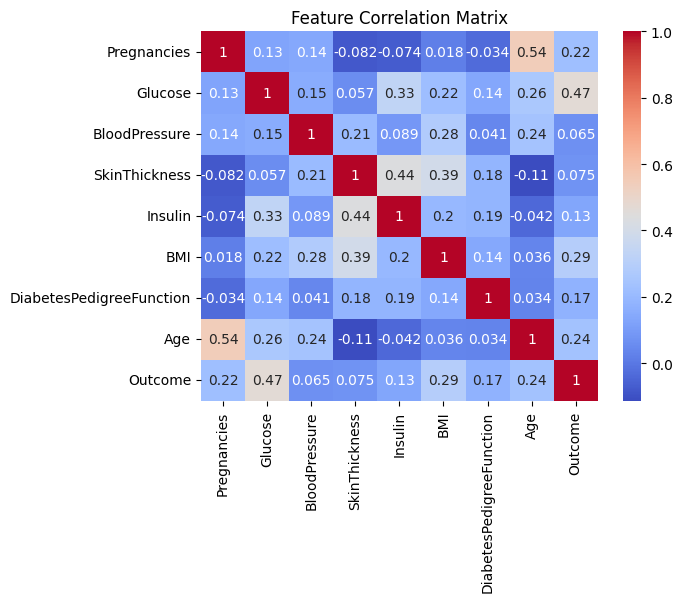

In [640]:
# plot the correlation matrix
corr_matrix = dataset.corr()
sbn.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

#### 6. Data preprocessing

In [641]:
# split independent and dependent variables
X = dataset.loc[:, dataset.columns != "Outcome"]
y = dataset["Outcome"]

In [642]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [643]:
print("Dimension of features = ", X.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (768, 8)
Dimension of target =  (768,)


In [644]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 17)

print("X-train dim: ", X_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", X_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (537, 8)
Y-train:  537
X-test dim:  (231, 8)
Y-test:  231


In [645]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

transformer = make_column_transformer(
    (StandardScaler(), ["Pregnancies",  "BloodPressure",  "SkinThickness", "Insulin", "Age"]),
    (RobustScaler(), ["Glucose", "BMI", "DiabetesPedigreeFunction"])
)

In [646]:
# transformer will learn only from training data
transformer.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Pregnancies', 'BloodPressure',
                                  'SkinThickness', 'Insulin', 'Age']),
                                ('robustscaler', RobustScaler(),
                                 ['Glucose', 'BMI',
                                  'DiabetesPedigreeFunction'])])

In [647]:
# transformer will transform the train and test data
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [648]:
X_train

array([[-0.86127765,  0.95625096, -0.08933686, ..., -0.23076923,
        -0.57608696,  0.11398964],
       [ 1.51817494,  0.02335615,  0.78632747, ...,  0.17948718,
         0.32608696, -0.19170984],
       [ 2.41046966,  0.43797606, -0.21443177, ...,  0.1025641 ,
        -0.64130435, -0.25129534],
       ...,
       [ 1.81560651, -0.18395381, -1.27773846, ..., -0.23076923,
         0.        , -0.21761658],
       [ 0.03101707,  0.02335615,  0.72378002, ..., -0.66666667,
         0.07608696,  0.23316062],
       [-1.15870922,  0.02335615,  0.41104275, ..., -0.58974359,
         1.20652174, -0.02331606]], shape=(537, 8))

In [649]:
y_train

600    0
248    0
582    0
274    0
518    0
      ..
406    1
390    0
143    1
241    0
623    0
Name: Outcome, Length: 537, dtype: int64

In [650]:
classes = np.unique(y)
print("Avalilable classes: ", classes)

Avalilable classes:  [0 1]


#### 7. KNN Classifier

In [651]:
from scripts.classifiers import KNNModel
import time

# train model
sttrain_knn = time.time()
knn = KNNModel()
knn_model = knn.train(X_train, y_train)

# calculate time
ettrain_knn = time.time()
ttrain_knn = ettrain_knn - sttrain_knn
print(f"Time of training KNN: {ttrain_knn:.3f} seconds")

Best KNN Parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Time of training KNN: 0.492 seconds


In [652]:
# deploy knn model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="knn_v1.pkl", model=knn_model)

In [653]:
# Evaluate the model on the test set
y_knn_pred = knn_model.predict(X_test)

In [654]:
print("KNN Classification Report:")
print(classification_report(y_test, y_knn_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.71      0.57      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



#### 8. SVM Classifier

In [655]:
from scripts.classifiers import SVMModel

# train model
sttrain_svm = time.time()
svm = SVMModel()
svm_model = svm.train(X_train, y_train)

# calculate time
ettrain_svm = time.time()
ttrain_svm = ettrain_svm - sttrain_svm
print(f"Time of training SVM: {ttrain_svm:.3f} seconds")

Best SVM Parameters: {'C': 1, 'class_weight': 'balanced', 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Time of training SVM: 0.373 seconds


In [656]:
# deploy svm model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="svm_v1.pkl", model=svm_model)

In [657]:
# Evaluate the model on the test set
y_svm_pred = svm_model.predict(X_test)

In [658]:
print("SVM Classification Report:")
print(classification_report(y_test, y_svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       150
           1       0.71      0.52      0.60        81

    accuracy                           0.76       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231

